# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')
import plotly.express as px
import plotly.graph_objs as go

#Conect plotly and pandas
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Load data

In [2]:
df = pd.read_csv("datasets/heart.csv")

# Data Dictionary 

1. Age: Age of the patient [years]
2. Sex: Sex of the patient [M: Male, F: Female]
3. ChestPainType: [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: Resting blood pressure [mm Hg]
5. Cholesterol: Serum cholesterol [mm/dl]
6. FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: ST [Numeric value measured in depression]
11. ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: Output class [1: heart disease, 0: Normal]

# Getting a first view on the dataset

In [3]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


# Checking data types

Age, RestingBP, Cholesterol, FastingBS, MaxHR, OldPeak and HeartDisease should be int/float. We check it out with df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
numericalCols = df.select_dtypes("number").columns
categoricalCols = df.select_dtypes("object").columns

print("Numerical columns: ", numericalCols)
print("Categorical columns: ", categoricalCols)

Numerical columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
Categorical columns:  Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


Data Types seem to be correct.

# Number of duplicated values

In [6]:
df.duplicated().sum()

0

There are no duplicates. 

# Checking for null values

In [7]:
df.isnull().sum().sort_values(ascending=False)

HeartDisease      0
ST_Slope          0
Oldpeak           0
ExerciseAngina    0
MaxHR             0
RestingECG        0
FastingBS         0
Cholesterol       0
RestingBP         0
ChestPainType     0
Sex               0
Age               0
dtype: int64

In [8]:
df.isna().sum().sort_values(ascending=False)

HeartDisease      0
ST_Slope          0
Oldpeak           0
ExerciseAngina    0
MaxHR             0
RestingECG        0
FastingBS         0
Cholesterol       0
RestingBP         0
ChestPainType     0
Sex               0
Age               0
dtype: int64

There are no missing values

# Numerical variables analysis

## Value Distribution and Skewed Classes

In [9]:
numericalCols

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
df[numericalCols].iplot(kind='histogram',subplots=True,bins=50)

In [12]:
fig = df[numericalCols].iplot(kind='histogram',bins=50)

In [13]:
df[numericalCols].skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

Another useful tool for plotting the shape of a distribution is Kernel Density Estimation (KDE).

The Kernel Density Estimation works by plotting out the data and beginning to create a curve of the distribution. The curve is calculated by weighing the distance of all the points in each specific location along the distribution. If there are more points grouped locally, the estimation is higher as the probability of seeing a point at that location increases. 

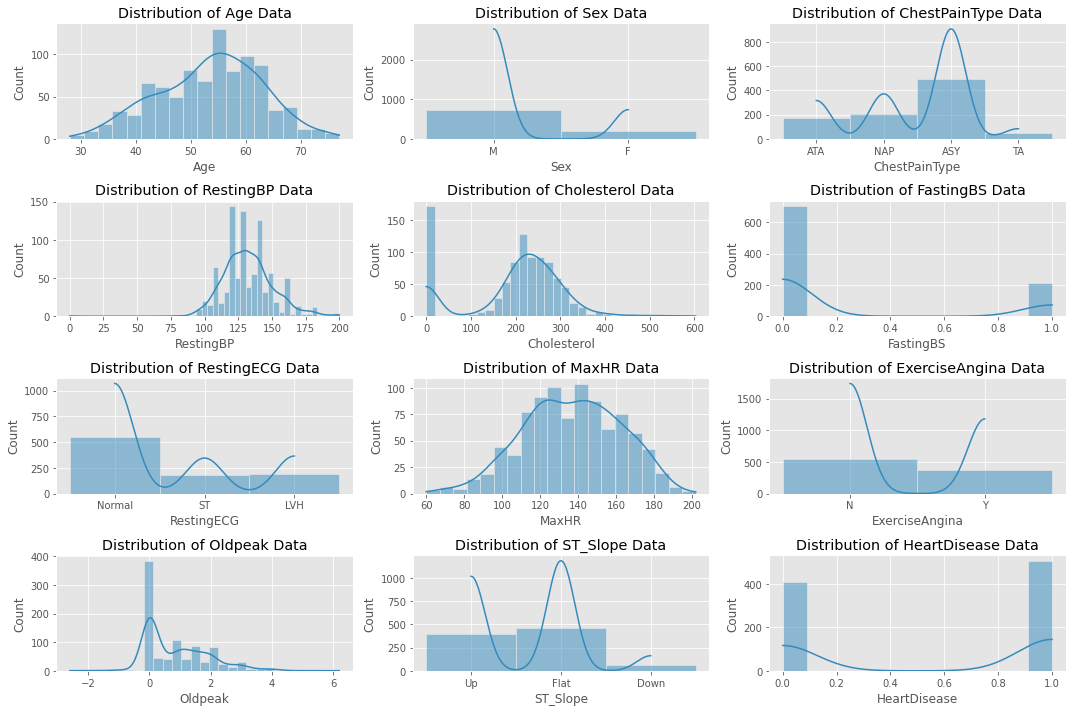

In [14]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

FastingBS variable seems skewed, as we can see from both the histogram and the skew level (greater than 1). oldPeak is a bit skewed too

## Correlation between variables

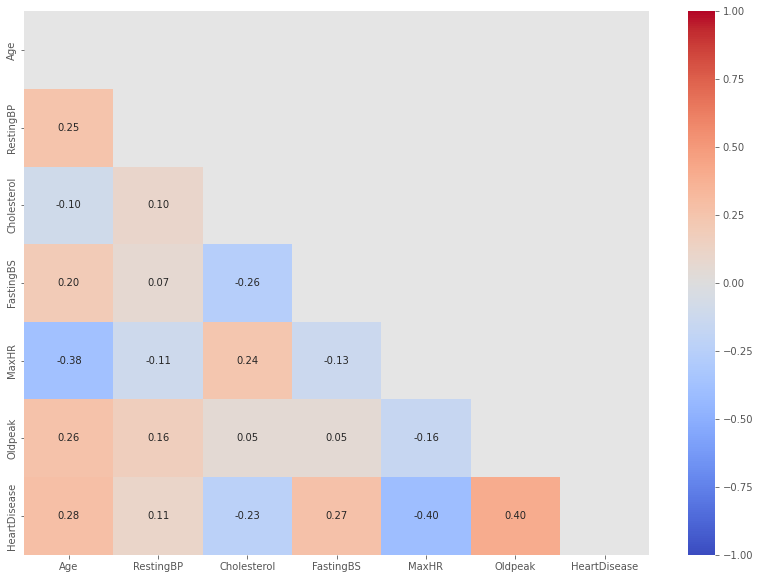

In [15]:
matrix = np.triu(df[numericalCols].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (df[numericalCols].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

In [16]:
px.imshow(df.corr(),
    height = 600,
    width = 600,
    title="Correlation Plot of the Heat Failure Prediction",
    )

* Moderate Negative correlation between Cholesterol & Maximum Heart Rate (MaxHR) with Heart Disease
* Moderate Positive correlation between Old Peak (Depressed ST) and Heart Disease
* Weak Positive correlation between Age & Fasting Blood Sugar (FastgingBS) Levels with Heart Disease

# Categorical variables analysis

In [17]:
for i in categoricalCols:
    print("Distinct Values for ", i, " - ", df[i].unique())

Distinct Values for  Sex  -  ['M' 'F']
Distinct Values for  ChestPainType  -  ['ATA' 'NAP' 'ASY' 'TA']
Distinct Values for  RestingECG  -  ['Normal' 'ST' 'LVH']
Distinct Values for  ExerciseAngina  -  ['N' 'Y']
Distinct Values for  ST_Slope  -  ['Up' 'Flat' 'Down']


We can see there are no zero variance columns (identical values) and no extremely high variance columns.

Let's check out the correlation between the Heart Disease and categorical variables

## Sex

In [18]:
traces = go.Bar(x = df.groupby("Sex").HeartDisease.sum().index, y = df.groupby("Sex").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Sex") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

In [19]:
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 height = 600,
                 width = 600,
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

Number and percentage for each class. Men are more than twice as likely to present this heart disease

In [20]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [21]:
df.groupby("Sex").HeartDisease.sum().divide(df.Sex.value_counts()) * 100

F    25.906736
M    63.172414
dtype: float64

## ChestPainType

In [22]:
traces = go.Bar(x = df.groupby("ChestPainType").HeartDisease.sum().index, y = df.groupby("ChestPainType").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Chest Pain Type") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

ASY pain seems to be related to the disease: Asymptomatic chest pain (ASY) has almost 6 times more likely have a heart disease than person with ATA Atypical Angina chest pain

In [23]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [24]:
df.groupby("ChestPainType").HeartDisease.sum().divide(df.ChestPainType.value_counts()) * 100

ASY    79.032258
ATA    13.872832
NAP    35.467980
TA     43.478261
dtype: float64

## ExerciseAngina

In [25]:
traces = go.Bar(x = df.groupby("ExerciseAngina").HeartDisease.sum().index, y = df.groupby("ExerciseAngina").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Exercise Angina") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

Exercise-induced angina ("Yes") is over 2 times more likely have this Heart Disease than "No"

In [26]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [27]:
df.groupby("ExerciseAngina").HeartDisease.sum().divide(df.ExerciseAngina.value_counts()) * 100

ExerciseAngina
N    35.100548
Y    85.175202
dtype: float64

## RestingECG

In [28]:
traces = go.Bar(x = df.groupby("RestingECG").HeartDisease.sum().index, y = df.groupby("RestingECG").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by Resting ECG") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

Resting Electrocardiogram results don't differ much for each class.

In [29]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [30]:
df.groupby("RestingECG").HeartDisease.sum().divide(df.RestingECG.value_counts()) * 100

LVH       56.382979
Normal    51.630435
ST        65.730337
dtype: float64

## ST_Slope

In [31]:
traces = go.Bar(x = df.groupby("ST_Slope").HeartDisease.sum().index, y = df.groupby("ST_Slope").HeartDisease.sum())
layout = go.Layout(height = 600,
                    width = 600,
                    autosize = False,
                    title = "Heart Disease Pressence by ST Slope") 
fig = go.Figure(data = traces, layout = layout)
fig.show()

Downslopping and Flat Peak are much more likely to present the Disease than Upslopping

In [32]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [33]:
df.groupby("ST_Slope").HeartDisease.sum().divide(df.ST_Slope.value_counts()) * 100

Down    77.777778
Flat    82.826087
Up      19.746835
dtype: float64

# Checking for skewed classes on Heart Disease

In [34]:
df["HeartDisease"].skew()

-0.21508633825088655

In [35]:
print("Number of pacients which present a heart disease: ", df["HeartDisease"].value_counts()[1], ", ", "{:.2f}".format(df["HeartDisease"].value_counts(normalize = True)[1]*100), "% of total patients approximately")
print("Number of pacients which do not present a heart disease: ", df["HeartDisease"].value_counts()[0], ", ", "{:.2f}".format(df["HeartDisease"].value_counts(normalize = True)[0]*100), "% of total patients approximately")

Number of pacients which present a heart disease:  508 ,  55.34 % of total patients approximately
Number of pacients which do not present a heart disease:  410 ,  44.66 % of total patients approximately


Classes are well balanced. Therefore, we can use <b>Accuracy</b> as a metric

# Checking for Outliers

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.

![title](imgs/whiskersPlot.png)

## Age

In [36]:
fig = px.box(df,
    y="Age",
    x="HeartDisease",
    height = 600,
    width = 600,
    title=f"Distrubution of Age")
fig.show()

## RestingBP

In [37]:
fig = px.box(df,
    y="RestingBP",
    x="HeartDisease",
    height = 600,
    width = 600,
    title=f"Distrubution of RestingBP",
    color="Sex")
fig.show()

## Cholesterol

In [38]:
fig = px.box(df,
    y="Cholesterol",
    x="HeartDisease",
    height = 600,
    width = 600,
    title=f"Distrubution of Cholesterol")
fig.show()

## OldPeak

In [39]:
fig = px.box(df,
    y="Oldpeak",
    x="HeartDisease",
    height = 600,
    width = 600,
    title=f"Distrubution of OldPeak")
fig.show()

## MaxHR

In [40]:
fig = px.box(df,
    y="MaxHR",
    x="HeartDisease",
    height = 600,
    width = 600,
    title=f"Distrubution of MaxHR")
fig.show()